### Introduction to working with the archive

Alistair Duffey, October 2024

In [1]:
# imports
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.stats as stats
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import xarray as xr

/home/users/a_duffey/.conda/envs/cmipv2/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)



We'll be comparing 3 different cases:
- **ssp245_baseline**: The 1.5°C warmer than pre-industrial world, which SAI will target. 2013-2022 in UKESM.
- **ssp245**: the late 21st century in our global warming scenario: 2050 - 2069 in the control experiment. This is the future under moderate/high GHG emissions and global warming. 
- **ARISE**: the late 21st century in our stratospheric aerosol geoengineering experiment: 2050-2069 in the feedback-controlled SAI experiment, ARISE, which branches from SSP2-4.5 in 2035.


In [9]:
# let's define a function to avoid typing out file paths.

def get_data(group, model, window, table, variable, season='annual', mean_or_std='mean'):
    # group: 'ARISE', 'GeoMIP'
    # model: if group=='ARISE': UKESM1-0-LL or CESM2-WACCM; 
    ######## if group='GeoMIP': any of the 6 G6 models
    # window: if group =='ARISE': ['SSP245_background', 'SSP245_baseline', 'ARISE_assmt']
    ######### if group =='GeoMIP': ['G6sulfur_assmt', 'SSP245_baseline', 'SSP245_target', 'SSP585_background']
    # table: 'Amon', 'Omon', 'Lmon'
    # variable: many
    # season: 'annual', 'DJF', 'MAM', 'JJA', or 'SON'
    # mean_or_std: 'mean' or 'std'
    
    path = 'pp_archive/{a}/{b}/maps/{c}/{d}/{e}/{f}/*_{g}_*.nc'.format(a=group, b=model, c=window,
                                                                       d=table, e=variable,
                                                                       f=mean_or_std, g=season)
    data = xr.open_mfdataset(path)
    return data

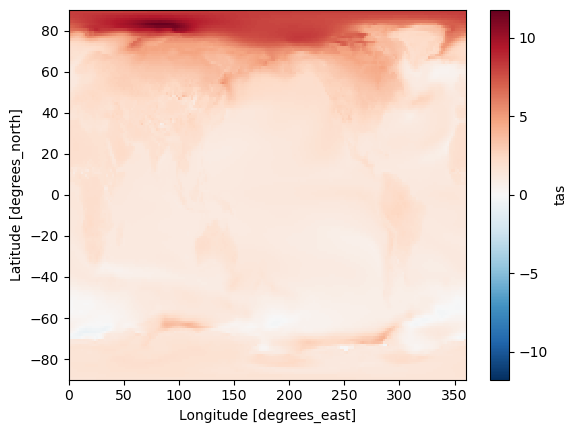

In [8]:
ssp245 = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='SSP245_background', table='Amon',
                  variable='tas', mean_or_std='mean', season='annual')
baseline = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='SSP245_baseline', table='Amon',
                  variable='tas', mean_or_std='mean', season='annual')
ARISE = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='ARISE_assmt', table='Amon',
                  variable='tas', mean_or_std='mean', season='annual')

## check plot:
(ssp245 - baseline)['tas'].plot()

/tmp/ipykernel_611/3773394057.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout() # this call tightens up the arrangement of subplots to lose white space, often useful.


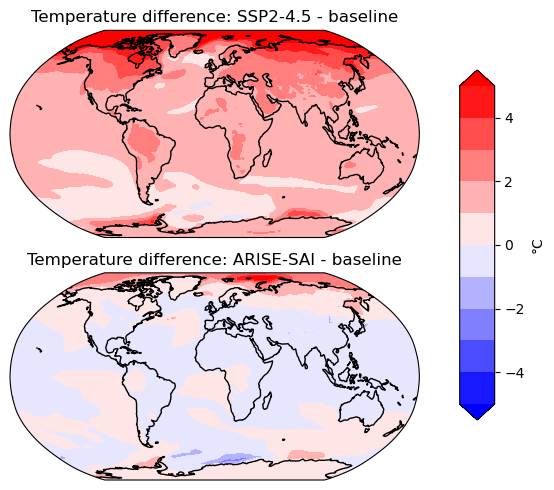

In [13]:
var = 'tas'

ssp245 = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='SSP245_background', table='Amon',
                  variable=var, mean_or_std='mean', season='annual')
baseline = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='SSP245_baseline', table='Amon',
                  variable=var, mean_or_std='mean', season='annual')
ARISE = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='ARISE_assmt', table='Amon',
                  variable=var, mean_or_std='mean', season='annual')


data_to_plot_1 = (ssp245 - baseline)[var]
data_to_plot_2 = (ARISE - baseline)[var]

lats1 = data_to_plot_1.y
lats2 = data_to_plot_2.y
lats = [lats1, lats2]

data_to_plot_1, lons1 = add_cyclic_point(data_to_plot_1, data_to_plot_1.x)
data_to_plot_2, lons2 = add_cyclic_point(data_to_plot_2, data_to_plot_2.x)
lons = [lons1, lons2]

scenarios = ['SSP2-4.5', 'ARISE-SAI']
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7,5), 
                        subplot_kw={'projection': ccrs.Robinson()})

i=0
for d in [data_to_plot_1, data_to_plot_2]:    
    p = axs[i].contourf(lons[i], lats[i], d, 
                 transform=ccrs.PlateCarree(),
                 cmap='bwr',
                 levels = np.arange(-5, 6, 1),
                  extend='both'      
                         )

    axs[i].coastlines()
    axs[i].set_title('Temperature difference: {} - baseline'.format(scenarios[i]))
    i=i+1


### Add a colorbar
# Adjust the layout to make room for the colorbar on the right
plt.subplots_adjust(right=0.8, hspace=0.4)
# Create a colorbar to the right of the subplots
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7])  # (left, bottom, width, height)
cbar = plt.colorbar(p, cax=cax, orientation='vertical', label='°C')

plt.tight_layout() # this call tightens up the arrangement of subplots to lose white space, often useful. 
plt.show()

## Section 5: Plotting hydrological change

/tmp/ipykernel_611/3823868638.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout() # this call tightens up the arrangement of subplots to lose white space, often useful.


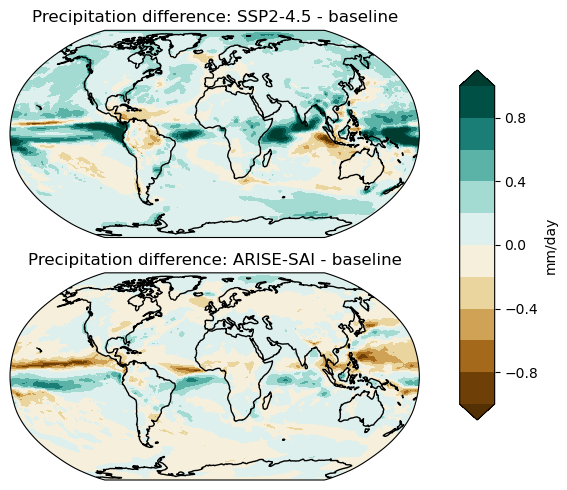

In [15]:
var = 'pr'

ssp245 = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='SSP245_background', table='Amon',
                  variable=var, mean_or_std='mean', season='annual')
baseline = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='SSP245_baseline', table='Amon',
                  variable=var, mean_or_std='mean', season='annual')
ARISE = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='ARISE_assmt', table='Amon',
                  variable=var, mean_or_std='mean', season='annual')


unit_conversion_pr = 86400
data_to_plot_1 = (ssp245 - baseline)[var]*unit_conversion_pr
data_to_plot_2 = (ARISE - baseline)[var]*unit_conversion_pr

lats1 = data_to_plot_1.y
lats2 = data_to_plot_2.y
lats = [lats1, lats2]

data_to_plot_1, lons1 = add_cyclic_point(data_to_plot_1, data_to_plot_1.x)
data_to_plot_2, lons2 = add_cyclic_point(data_to_plot_2, data_to_plot_2.x)
lons = [lons1, lons2]

scenarios = ['SSP2-4.5', 'ARISE-SAI']
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7,5), 
                        subplot_kw={'projection': ccrs.Robinson()})

i=0
for d in [data_to_plot_1, data_to_plot_2]:    
    p = axs[i].contourf(lons[i], lats[i], d, 
                 transform=ccrs.PlateCarree(),
                 cmap='BrBG',
                 levels = np.arange(-1, 1.2, 0.2),
                  extend='both'      
                         )

    axs[i].coastlines()
    axs[i].set_title('Precipitation difference: {} - baseline'.format(scenarios[i]))
    i=i+1


### Add a colorbar
# Adjust the layout to make room for the colorbar on the right
plt.subplots_adjust(right=0.8, hspace=0.4)
# Create a colorbar to the right of the subplots
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7])  # (left, bottom, width, height)
cbar = plt.colorbar(p, cax=cax, orientation='vertical', label='mm/day')
plt.tight_layout() # this call tightens up the arrangement of subplots to lose white space, often useful. 

plt.show()


#### to show the value of the pp_archive, we can work across multiple variables and models:

